In [1]:
import torch 
import numpy as np
import pandas as pd

In [2]:
inputs1 = torch.tensor(
    [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]],
    dtype=torch.float32
)

weights1 = torch.tensor(
    [[0.2, 0.8, -0.5, 1.0],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]],
    dtype=torch.float32
)

biases1 = torch.tensor(
    [2.0,3.0,0.5],
    dtype=torch.float32
)

In [3]:
def layer(inputs:list, weights:list, biases:list) -> list:
    """Pure python NN Layer

    Args:
        inputs (list): inputs from previous layer
        weights (list): weights of each neuron in layer
        biases (list): biases of each neuron in layer

    Returns:
        list: output of each neuron in layer 
    """
    layer_outputs = []
    for neuron_input in inputs:
        neuron_output = []
        for neuron_weights, neuron_bias in zip(weights, biases):
            output_vals = 0
            for n_input, weight in zip(neuron_input, neuron_weights):
                output_vals += n_input*weight
            output_vals += neuron_bias
            neuron_output.append(output_vals)
        layer_outputs.append(neuron_output)
    return layer_outputs

layer(inputs1.tolist(), weights1.tolist(), biases1.tolist())

[[4.80000002682209, 1.209999918937683, 2.385000005364418],
 [8.90000006556511, -1.8100001215934753, 0.19999997317790985],
 [1.410000077784062, 1.0509998478889457, 0.025999927461146655]]

In [4]:
def layer_vec(inputs:torch.tensor, weights:torch.tensor, biases:torch.tensor):
    """
        PyTorch vectorized NN Layer

    Args:
        inputs (torch.tensor): inputs from previous layer
        weights (torch.tensor): weights of each neuron in layer
        biases (torch.tensor): biases of each neuron in layer

    Returns:
        torch.tensor: output of each neuron in layer 
    """
    cummulative = torch.matmul(inputs, weights.T) + biases
    return cummulative

In [5]:
output1 = layer_vec(inputs1, weights1, biases1)

# Multi layer implementation 

In [6]:
X = torch.tensor(
    [[1, 2, 3, 2.5],
     [2.0, 5.0, -1.0, 2.0],
     [-1.5, 2.7, 3.3, -0.8]],
    dtype=torch.float32
)

class Layer_Dense:
    """ 
        PyTorch Vectorized Dense Layer 
    """
    def __init__(self, n_inputs:int, n_neurons:int):
        self.weights = torch.randn(n_inputs, n_neurons)
        self.biases = torch.zeros((1, n_neurons))
    def forward(self, inputs:torch.tensor):
        self.output = torch.matmul(inputs, self.weights) + self.biases

In [7]:
L1 = Layer_Dense(4, 5)
L2 = Layer_Dense(5, 2)

In [8]:
L1.forward(X)
print(L1.output)
L2.forward(L1.output)
print(L2.output)

tensor([[-11.7817,   2.8950,   1.8262,  -0.5852,   0.2305],
        [ -0.8010,   0.8715,  -3.6017,  -5.5215,   1.3470],
        [ -7.3600,  -0.3618,  -3.8797,   0.1588,  -3.4827]])
tensor([[ -9.1434, -32.3427],
        [  0.9598, -10.1176],
        [ -1.6807, -23.0159]])


In [9]:
X.shape, L1.output.shape, L2.output.shape
print(f"Input shape:{list(X.shape)} --L1[4,5]--> {list(L1.output.shape)}")
print(f"Input shape:{list(L1.output.shape)} --L2[5,2]--> {list(L2.output.shape)}")

Input shape:[3, 4] --L1[4,5]--> [3, 5]
Input shape:[3, 5] --L2[5,2]--> [3, 2]


# Adding activation functions

In [10]:
class Activation:
    """
        PyTorch Vectorized Activation functions class
    """
    def __init__(self, name:str):
        if not hasattr(self, name):
            raise ValueError(f"Activation {name} is not defined.")
        self.activation = getattr(self, name)
    def ReLU(self, X:torch.tensor) -> torch.tensor:
        return torch.maximum(torch.zeros_like(X), X)

    def sigmoid(self, X:torch.tensor) -> torch.tensor:
        return 1/(1-torch.exp(-1*X))

    def LeakyReLU(self, X:torch.tensor) -> torch.tensor:
        return torch.maximum(0.01*X, X)
    
    def Linear(self, X:torch.tensor) -> torch.tensor:
        return X

In [11]:
class Layer_Dense_act:
    """ 
        PyTorch Vectorized Dense Layer with activation functions
    """
    def __init__(self, n_inputs:int, n_neurons:int, activation_name:str):
        self.weights = torch.randn(n_inputs, n_neurons) 
        self.biases = torch.zeros((1, n_neurons))
        self.activation = Activation(activation_name).activation
    def forward(self, inputs:torch.tensor):
        self.output = self.activation(
            torch.matmul(inputs, self.weights) + self.biases
            )

<function matplotlib.pyplot.show(close=None, block=None)>

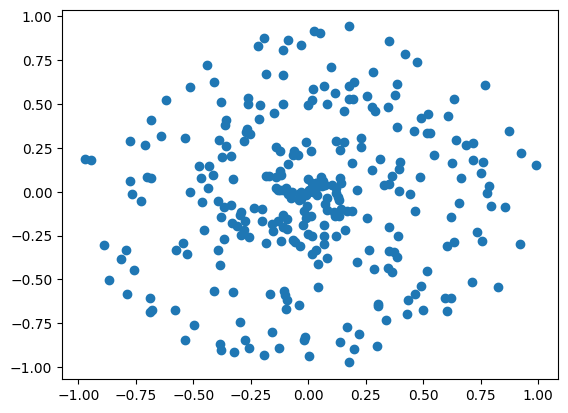

In [12]:
!pip install -qU nnfs
from nnfs.datasets import spiral_data

from matplotlib import pyplot as plt
torch.random.seed()
X,y = spiral_data(100,3)
X,y = torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.scatter(X[:,0], X[:,1])
plt.show

In [13]:
class Activation_ReLU:
    def forward(self, inputs:torch.tensor):
        print(type(inputs))
        self.output = torch.maximum(torch.zeros_like(inputs), inputs)

In [14]:
L1 = Layer_Dense(2, 5)
activation1 = Activation_ReLU()
L1.forward(X)
activation1.forward(L1.output)
print(L1.output)
print(activation1.output)

<class 'torch.Tensor'>
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.1841e-02, -1.6962e-02,  1.3582e-03,  5.2098e-03,  1.0287e-02],
        [-1.0630e-02, -4.0174e-02,  1.0595e-02,  4.6948e-03,  1.9173e-02],
        ...,
        [ 6.7897e-01,  1.9470e+00, -4.4408e-01, -2.9943e-01, -9.7802e-01],
        [-4.0064e-01,  1.4360e+00, -7.0940e-01,  1.7480e-01, -4.5261e-01],
        [ 5.5400e-01,  1.9909e+00, -5.1352e-01, -2.4461e-01, -9.5825e-01]])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.3582e-03, 5.2098e-03, 1.0287e-02],
        [0.0000e+00, 0.0000e+00, 1.0595e-02, 4.6948e-03, 1.9173e-02],
        ...,
        [6.7897e-01, 1.9470e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.4360e+00, 0.0000e+00, 1.7480e-01, 0.0000e+00],
        [5.5400e-01, 1.9909e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [15]:
L0 = Layer_Dense_act(2, 5, 'Linear')
L0.forward(X)
print(L0.output)
L1 = Layer_Dense_act(2, 5, 'ReLU')
L1.forward(X)
print(L1.output)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
        [-0.0081, -0.0014, -0.0128,  0.0021, -0.0066],
        [-0.0177, -0.0017, -0.0169, -0.0020, -0.0047],
        ...,
        [ 0.8704,  0.0966,  0.9438,  0.0296,  0.3316],
        [ 0.5626, -0.0108, -0.0012,  0.3834, -0.3221],
        [ 0.8777,  0.0860,  0.8566,  0.0865,  0.2509]])
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.3643e-02, 5.9868e-03, 0.0000e+00, 6.2882e-04],
        [0.0000e+00, 3.4778e-02, 7.1530e-03, 0.0000e+00, 5.4142e-04],
        ...,
        [6.2716e-01, 0.0000e+00, 0.0000e+00, 1.4376e+00, 0.0000e+00],
        [1.0640e+00, 0.0000e+00, 5.9244e-02, 1.8340e+00, 2.3132e-02],
        [7.3490e-01, 0.0000e+00, 0.0000e+00, 1.5904e+00, 0.0000e+00]])


### Note: The values for both functions are different due to the random initilalization of weights
I have validated this by initializing weights with 1 and noting that the values were the same